# Lab 3 Draft Report: How Are Increasing Incarceration Rates Associated with Crime Rate?

Katie Mo, Errett Hobbs, and Ramiro Cadavid

## (1) Introduction

It's easy for candidates to support the idea of throwing criminals into prison to appear tough on crime; however, do available data support this position? Is incarceration associated with crime rate in North Carolina? If yes, then how so? To investigate these questions, we constructed a model that predicts crime rate ($crmrte$) as a function of the probability of getting arrested ($prbarr$), the probability of becoming convicted after arrest ($prbconv$), and the probability of becoming incarcerated upon conviction ($prbpris$). 

Incarceration is very costly; if it is not associated with lower crime rates, then the state of North Carolina should explore less costly alternatives. On average, incarceration costs the state of North Carolina \\$36,219 per inmate per year, whereas prison alternatives like probation or parole supervision cost less than \$5,000 per year<sup>1</sup>. The number of people imprisoned in America has increased from roughly 500,000 to over 2.2 million, more than four fold, between 1980 to 2015<sup>2</sup>.  

Our analysis indicates that the likelihood of arrests and convictions are both associated with lower crime rate, while the likelihood of incarcerations does not show any strong association. These findings suggest that using the money saved from reduced incarceration of less serious crimes to fund pilot programs to improve criminal justice processing procedures could be beneficial for reducing crime rate in North Carolina.

## (2) Exploratory Data Analysis

### Data cleaning and univariate analysis

We analyzed a dataset of crime statistics in North Carolina where all the variables are from 1987, except percent minority, that is from 1980. From the 97 rows in the dataset, six were empty and two were duplicated. Consequently, our final dataset contained 90 rows (counties) spread across 25 colums (variables).

In [5]:
# Import libraries and dataset
suppressMessages(library(stargazer))
suppressMessages(library(dplyr))
suppressMessages(library(corrplot))
suppressMessages(library(car))
suppressMessages(library(Hmisc))
suppressMessages(library(fBasics))
crime <- read.csv('crime_v2.csv')

paste("Number of unique counties:", length(unique(crime$county)))

[1] "Number of unique counties: 91"

In [5]:
paste("Structure of dataset")
str(crime)

[1] "Structure of dataset"

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [6]:
paste("Summary statistics of variables in dataset")
summary(crime)

[1] "Summary statistics of variables in dataset"

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

In [8]:
# Remove empty cases
clean <- crime[complete.cases(crime), ]

A deeper exploration of the variables available revealed possible errors and particular features in the distribution of these variables that may be useful to better model the relationships of interest to the campaign, that are exposed below.

#### Variables of interest

Throughout the exploratory analysis we looked at both level and transformed forms of our variables of interest (crime rate, probability of arrest, probability of conviction and probability of prison). However, throughout this and the modeling phases, we decided to include the log-transformed forms of our variables of interest for reasons that will be exposed throughout this report -mainly, because an elasticity interpretation of the models' results is both intuitive and helpful to compare counties with different crime rates.

##### County

We found two observations with the same `county` value (county 193). Upon closer inspection, we found that both observations contain the exact same data. Consequently, we removed one of these duplicate observations.

In [9]:
# One duplicated county (remove)
paste("Unique county identifier:", nrow(clean) == length(unique(clean$county)))
paste("Duplicated county id:", clean$county[duplicated(clean$county) & !is.na(clean$county)])
subset(clean, subset = clean$county == 193)
clean <- clean[!duplicated(clean$county), ]

[1] "Unique county identifier: FALSE"

[1] "Duplicated county id: 193"

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,...,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,...,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


##### Crime rate

`crime rate` values are within a reasonable range and there are no concentrations around specific values that would lead us to suspect measurement errors. Furthermore, the log-transformation doesn't increase the spread significantly, even for values that are close to zero and results in a distribution that is less skewed than its original form; these are additional reasons to include the log-transformed version of this variable in the final model.

In [10]:
summary(clean$crmrte)
summary(log(clean$crmrte))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020604 0.030002 0.033510 0.040249 0.098966 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -5.197  -3.883  -3.506  -3.542  -3.213  -2.313 

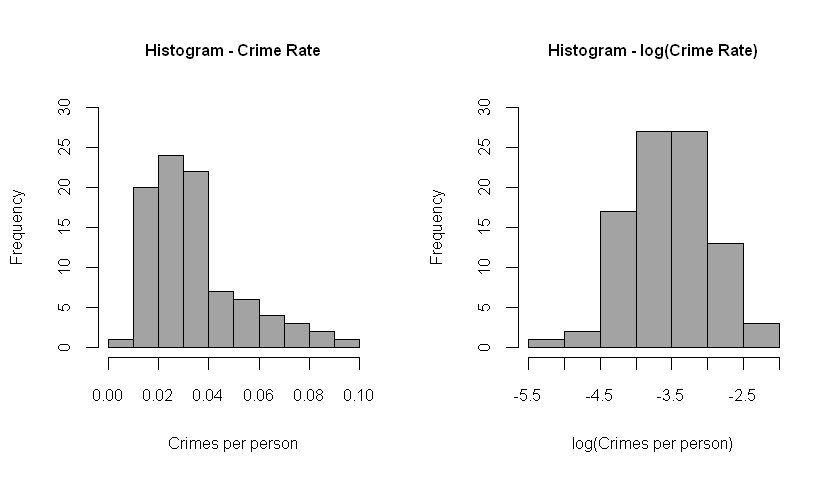

In [14]:
# Grid of histogram, crime rate and log(crime rate)

par(mfrow = c(1, 2), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
options(repr.plot.width=7, repr.plot.height=4)
hist(clean$crmrte, main = "Histogram - Crime Rate", col = rgb(0.4, 0.4, 0.4, 0.6), ylim = c(0, 30), xlab = "Crimes per person",
     breaks = sqrt(nrow(clean)))
hist(log(clean$crmrte), main = "Histogram - log(Crime Rate)", col = rgb(0.4, 0.4, 0.4, 0.6), ylim = c(0, 30), 
     xlab = "log(Crimes per person)", breaks = sqrt(nrow(clean)))

In [39]:
# Check for concentration of observations around certain values

freqs.crmrte <- data.frame(table(clean$crmrte))
paste("Repeated values:", 
      length(freqs.crmrte$Freq[freqs.crmrte$Freq > 1]))

[1] "Repeated values: 0"

##### Probability of arrest

`probability of arrest` has one value larger than 1. This is atypical but we cannot be sure that it is a error since we don't have enough information about how this variable is defined. For example, if `probability of arrest` is defined as $(\text{arrests_in_period_t} / \text{crimes_in_period_t})$, values larger than 1 are possible since arrests in period t correspond both to crimes committed in period $t$ but also in $t-i$. The log-transformation is also within a reasonable range and returns a variables that is less skewed.

In [18]:
# Observations larger than 1
clean[clean$prbarr > 1, ]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
51,115,87,0.0055332,1.09091,1.5,0.5,20.7,0.00905433,0.3858093,28.1931,...,503.2351,217.4908,342.4658,245.2061,448.42,442.2,340.39,386.12,0.1,0.07253495


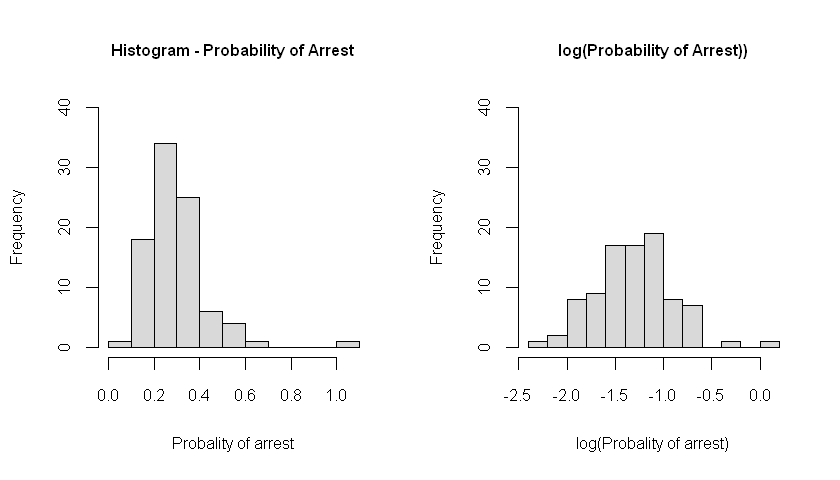

In [30]:
par(mfrow = c(1, 2), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
hist(clean$prbarr, main = "Histogram - Probability of Arrest", xlab = "Probality of arrest", 
     breaks = 10, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.3))
hist(log(clean$prbarr), main = "log(Probability of Arrest))", xlab = "log(Probality of arrest)", 
     breaks = 10, ylim = c(0, 40), col = rgb(0.5, 0.5, 0.5, 0.3))

##### Probability of conviction

`probability of conviction` contains a " \' " value which is likely a typing error. This value was removed with the 6 blank observations detected initially and was recasted from a factor to a number. There are 10 observations with values larger than 1 and one of them with a value higher than 2. Despite these values being unusually high they are possible for the same reasons exposed in the case of `prbarr`. Furthermore, in the case of `prbconv`, the lag between the arrest and the end of a trial could be even longer than the lag between crimmes and arrests. Therefore, since we don't have additional information on the definition used to build this variable and no way to validate which specific definition was used using numerical methods, we will keep these 10 values.

In [25]:
# Remove ` and cast the column to numeric
clean$prbconv <- as.numeric(as.character(clean$prbconv))

# Values above 1
paste("Summary statistics - Probability of conviction")
summary(clean$prbconv)
paste("Number of observations higher than 1:", length(clean$prbconv[clean$prbconv > 1]))

[1] "Summary statistics - Probability of conviction"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34422 0.45170 0.55086 0.58513 2.12121 

[1] "Number of observations higher than 1: 10"

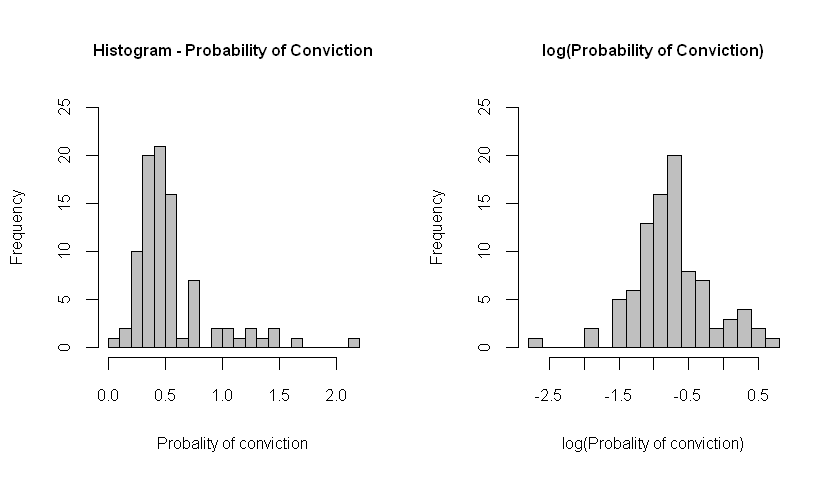

In [38]:
par(mfrow = c(1, 2), cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
hist(clean$prbconv, main = "Histogram - Probability of Conviction", xlab = "Probality of conviction",
     breaks = 15, ylim = c(0, 25), col = rgb(0.5, 0.5, 0.5, 0.5))
hist(log(clean$prbconv), main = "log(Probability of Conviction)", xlab = "log(Probality of conviction)",
     breaks = 15, ylim = c(0, 25), col = rgb(0.5, 0.5, 0.5, 0.5))

##### Probability of prison

Probability of prison spreads over a reasonable range and does not seem to have unusually high concentrations around certain values that would lead us to suspect measurement errors. Furthermore, the distribution of this variable is symmetric both in its original and log-transformed forms. It is interesting that, unlike probability of arrest and conviction, this variable does not have values larger than -or close to- 1, which further supports our suspicion that the numerator and denominator of the proabilibity variables comprise different periods, given the relatively large lag between the time a crime is commited and an arrest is made, for example, and small lag between the time a conviction is made and the sentence is delivered, where misdemeanor cases are usually sentenced immediately and felony cases in days to weeks.

In [17]:
paste("Summary statistics - Probability of prison")
summary(clean$prbpris)

[1] "Summary statistics - Probability of prison"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1500  0.3642  0.4222  0.4106  0.4576  0.6000 

#### Other variables

In [66]:
basicStats(clean[,  c("density", "avgsen", "west", "central", "urban", "mix")])[c(2:8), ]

,density,avgsen,west,central,urban,mix
NAs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Minimum,0.000020,5.380000,0.000000,0.000000,0.000000,0.019608
Maximum,8.827652,20.700001,1.000000,1.000000,1.000000,0.465116
1. Quartile,0.547177,7.375000,0.000000,0.000000,0.000000,0.080597
3. Quartile,1.569261,11.465000,0.000000,1.000000,0.000000,0.152061
Mean,1.435670,9.688889,0.244444,0.377778,0.088889,0.129045
Median,0.979245,9.110000,0.000000,0.000000,0.000000,0.100950


Further exploration of the remaining variables, yielded the following findings that are important to take into account in the model building process.

- The values of `density` are unusually small. Given that the density of North Carolina between 1980 and 1990 ranged from 120.9 to 136.4 [(US Census, 2018)](https://www.census.gov/population/www/censusdata/density.html) and that our sample contains 90% of counties, some of which are categorized as urban, a density of less than 1.6 for 75% of observations and a maximum density of 8.8 seems to be unusually low. It could be the case that this variable was rescaled; however, we cannot validate this using our dataset and this wouldn't in the $R^2$ or significance of the estimated coefficient. Then, we will not remove any observations.


- The average sentence ranges between 5.3 and 20.7 days, with a mean of 9.7 days. These are all very small numbers that may indicate that the average is taken over all convictions, including those with no prison sentences This definition is problematic for our purposes because a) `avgsen` will have a high collinearity with `prbpris` and b) the average sentence will be mainly driven by the no prison values and will not provide useful information on the sentences that result in prison. However, these is not necessarily evidence of measurement errors and we will not make any changes to this variable.


- We are unclear as to how `west` and `central` are each defined; we also do not know if they are exhaustive of all counties and mutually exclusive, since there are observations with a value of 1 in both and neither of these variables. Given this ambiguities and the regional effects that `density` may already capture, we will not include this variable in our subsequent analysis.


- The definition of `urban` according to whether the county is categorized as a standard metropolitan statistical area (SMSA) is ambiguous for our purposes, given that "such regions are neither legally incorporated as a city or town would be, nor are they legal administrative divisions like counties or separate entities such as states; because of this, the precise definition of any given metropolitan area can vary with the source". Therefore, incorporating this variable into our model would not provide meaningful information. Furthermore, the effects captured by this variable are likely captured also by `density`, which is a better candidate to include in our model.


- `mix`is also ambiguously defined since it is not clear what face-to-face offences mean and it is also not clear how some of the plausible interpretations of this variable could be of interest to solve our research question.

Upon inspecting other variables individually, we didn't find evidence of errors or other specially relevant features that needed to be taken into account into the model that we will build to answer our research question. The values in these variables were within reasonable ranges, there were no missing values and there were not unusually high concentrations of observations around certain values. Therefore, all the other variables that were not mentioned above were not transformed.

### Bivariate analysis

Once we have finished exploring the quality of the variables in the dataset, and the main features of the variables that are of interest to the campaign that need to be taken into account for building the model that will help us answering the campaign's research question, we need to start exploring how the variables of interest relate to each other, mainly, how our variables of interest relate to `crime rate` and to other predictors of `crime rate` that may improve the model by reducing bias and increasing the efficiency of their estimated coeffcients.

#### Variables of interest

An initial exploration of the relationship between `crime rate` and `log(crime rate)` and our variables of interest (probability of arrest, probability of conviction, probability of prison and average sentence) indicates a relationship that is similar for both crime rate and its logarithmic form. Specifically, there seems to be a negative relationship with probability of arrest and probability of conviction but not a clear relationship with probability of prison.

Following this initial exploration, we will proceed to further investigate the relationships hinted at by the scatterplot matrix, using correlation analysis to quantify their strength. Even though we validated both the original and log-transformed forms of our variables of interest, we focus our presentation on the log transformation of these variables because these are the forms included in the regression model for the reasons exposed throughout this report (mainly, interpretability, symmetry and compliance with the classic linear model assumptions).

In [86]:
# Variables of interest
vars.interest <- c("log.crmrte", "log.prbarr", "log.prbconv","log.prbpris")

# Log transformations
clean$log.crmrte <- log(clean$crmrte)
clean$log.prbarr <- log(clean$prbarr)
clean$log.prbconv <- log(clean$prbconv)
clean$log.prbpris <- log(clean$prbpris)
clean$density2 <- clean$density^2
clean$log.polpc <- log(clean$polpc)
clean$log.taxpc <- log(clean$taxpc)

[1] "Scatterplot matrix of variables of interest and Crime rate"

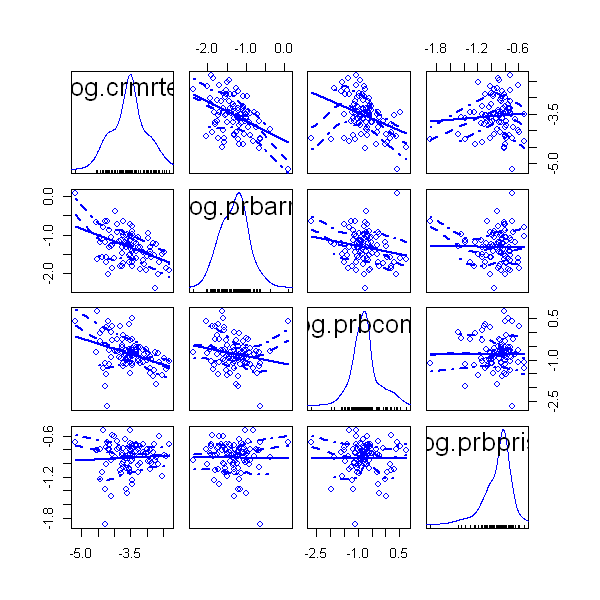

In [96]:
paste("Scatterplot matrix of variables of interest and Crime rate")
options(repr.plot.width=5, repr.plot.height=5)
scatterplotMatrix(clean[, vars.interest])

Analysis of correlations confirms that probability of arrest and probability of conviction (both in their original and log-transformed forms) are negatively correlated with both crime rate and its logarithmic transformation, and also confirms that there is no correlation between these two variables and probability of prison and average sentence.

For all variables of interest (probability of arrest, probability of conviction and probability of arrest) the linear relationship measured by the correlation coefficient is higher when `crime rate` is log-transformed. Therefore, we should test both forms of this variable when building our model taking this into account (but also how the two forms of this variable affect the interpretability of results and how they affect the model assumptions).

The log form of our variables of interest does not change the correlation between them and `crime rate` heavily. However, it is still important to consider this transformation when defining our population model because they could improve the model's interpretability and assumptions.

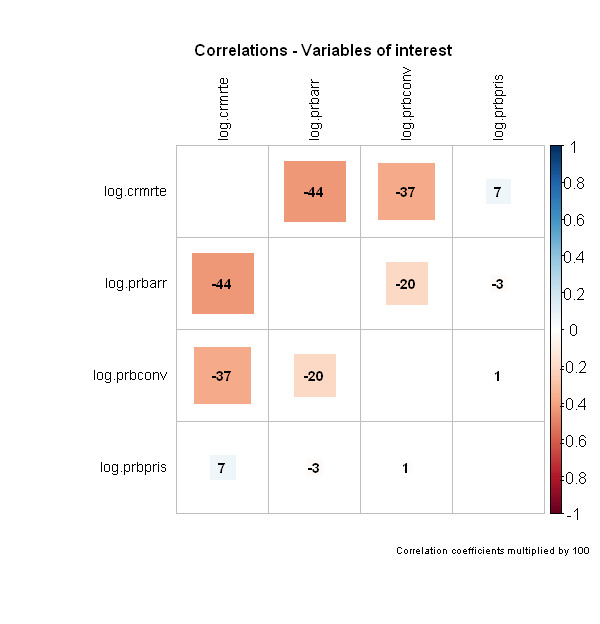

In [97]:
# Compute correlations
crime.corrs <- cor(select(clean, vars.interest))

# Plot correlations
options(repr.plot.width=5, repr.plot.height=5.2)
corrplot(crime.corrs, method = 'square',  order = 'original', diag = FALSE, addCoef.col = T, 
         tl.col = 'black', tl.cex = 0.7, addCoefasPercent = T, number.cex = 0.7)
title("Correlations - Variables of interest", cex.main = 0.8)
require(grid)
grid.text(label= "Correlation coefficients multiplied by 100" , x = unit(1,"npc") - unit(2, "mm"),
          y = unit(1.5, "cm"), just=c("right", "bottom"), gp=gpar(cex= 0.5))

#### Control variables

After exploring bivariate relationships between our variables of interest, our main objective is to find variables that either confound the effect of our variables of interest on `crime rate` or that can increase the model's fit, reducing the variance of the model's error and of the coefficients of interest. To find which variables can be used as controls in our model, we did an initial exploratory analysis using a scatterplot matrix (not shown in this document due to space constraints) to find which of the candidate variables seemed to be related to `crime rate` or its logarithmic transformation. 

Upon inspecting the scatterplot matrix, we found that log of police per capita, tax per capita and density seem to have a clear relationship with `crime rate` and its logarithmic transformations. The correlation matrix included below shows that `log.polpc`, `density`, and `density2` are correlated with both `crime rate` and its logarithmic transformation and thus should be included in our estimated model. Furthermore, density is both correlated with `crime rate` and `log.prbarr`, which indicates that it may be a possible confounding variable and should also be included in our estimated model to reduce the bias of the estimator of the coefficient of `log.prbarr`.

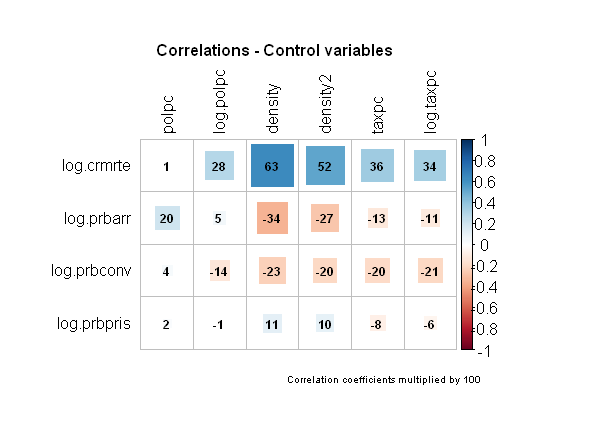

In [93]:
# Possible control variables

vars.control <- c('polpc', 'log.polpc', 'density', 'density2', 'taxpc', 'log.taxpc')

# Plot correlation coefficients

corrs.control <- cor(clean[, c(vars.interest, vars.control)], use = 'complete.obs')[1:4, 5:10]

options(repr.plot.width=5, repr.plot.height=3.7)
par(oma = c(0,0,0,4))
corrplot(corrs.control, method = 'square',  order = 'original', diag = T, addCoef.col = T,
         tl.col = 'black', tl.cex = 0.8, addCoefasPercent = T, number.cex = 0.6)
title("Correlations - Control variables", cex.main = 0.8)
grid.text(label= "Correlation coefficients multiplied by 100" , x = unit(10.2,"cm"), y= unit(1.3, "cm"),
          just=c("right", "bottom"), gp=gpar(cex= 0.5))

In conclusion, the main recommendations provided by the exploratory data analysis, that need to be taken into account when specifying our regression model are the following:

- Both `crime rate` and its logarithmic transformation should be tested as possible dependent variables.


- `probability of arrest` and `probability of conviction`, two of our variables of interest, are correlated with both our candidate dependent variables and should be included in the regression model. Furthermore, their logarithmic transformation form is also correlated with the dependent variable and should be tested against their original form, using the resulting model's fit and meeting of the CLM asssumptions to decide which should be included in the specification of model 2.


- `probability of prison` does not seem to have an important relationship with `crime rate`. However, this is a result that is relevant to the campaign's research question; thus, it should be included in the regression, in order to show this variable's statistical and practical significance and the implications of this result to the political campaign.


- `log.polpc`, `density`, `density2` and `log.taxpc` seem to have the strongest relationship with `crime rate` and its logarithmic form and we should consider including them within our model specification as controls. It is especially important to include `density`, since it is likely controlling for confounding effects.